<a href="https://colab.research.google.com/github/adong-hood/dm-24/blob/main/final_project_umap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
!pip install hdbscan

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

## Load data

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(int)

In [ ]:
print(mnist.data.shape)
mnist.data.head()

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


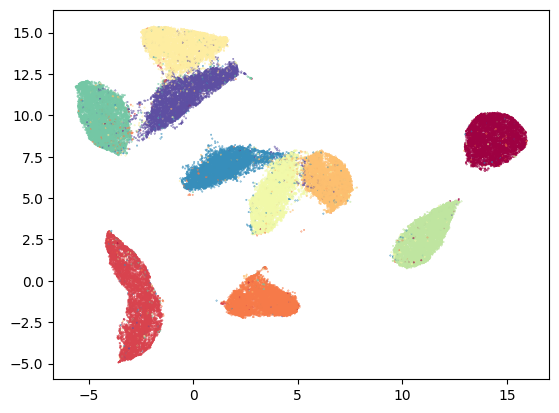

In [ ]:
standard_embedding = umap.UMAP().fit_transform(mnist.data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target.astype(int), s=0.1, cmap='Spectral');

## KMeans with original data

0.3662274174341873 0.4994631060396748


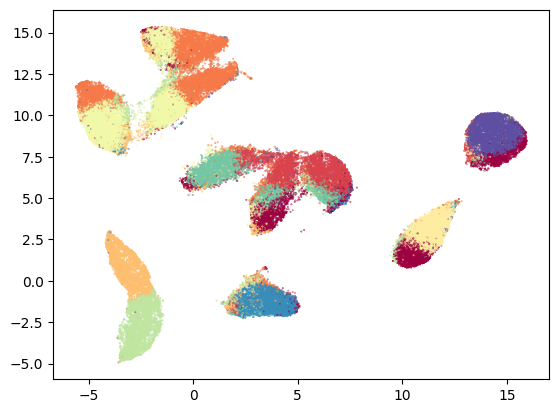

In [ ]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(mnist.data)
print(adjusted_rand_score(mnist.target, kmeans_labels), adjusted_mutual_info_score(mnist.target, kmeans_labels))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');

## PCA + HDBSCAN

0.057511123574007526 0.322380642628063


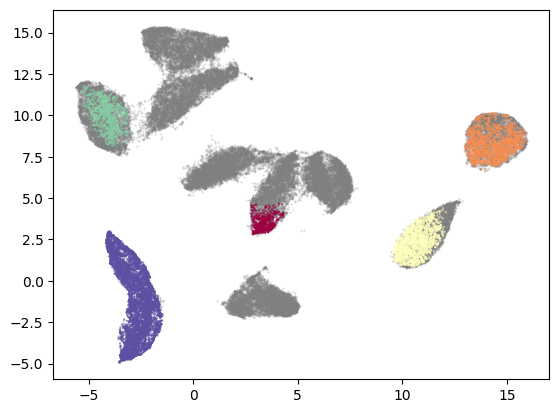

In [ ]:
lowd_mnist = PCA(n_components=50).fit_transform(mnist.data)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_mnist)
print(adjusted_rand_score(mnist.target, hdbscan_labels), adjusted_mutual_info_score(mnist.target, hdbscan_labels))
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral');

## Apply UMAP

In [ ]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(mnist.data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


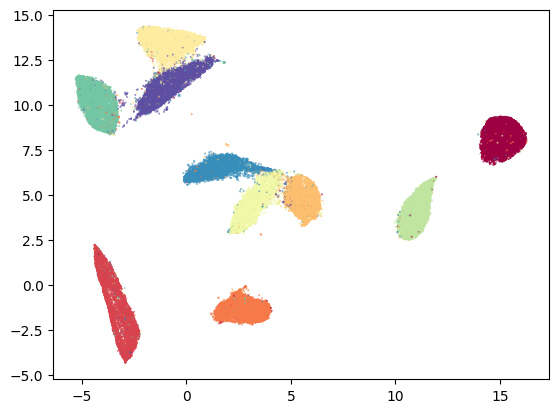

In [ ]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], c=mnist.target, s=0.1, cmap='Spectral');

## UMAP + KMEANS

0.7635660553017232 0.8407541924173004


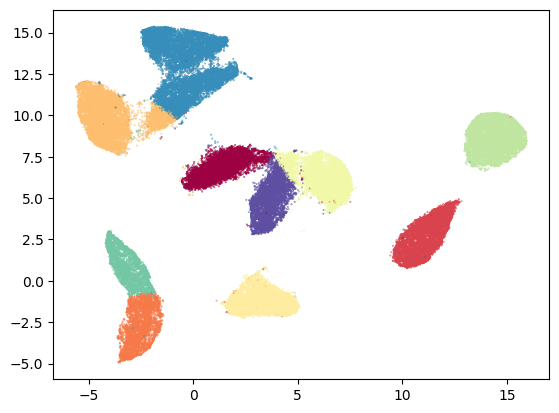

In [ ]:
kmeans_labels_umap = cluster.KMeans(n_clusters=10).fit_predict(clusterable_embedding)
print(adjusted_rand_score(mnist.target, kmeans_labels_umap), adjusted_mutual_info_score(mnist.target, kmeans_labels_umap))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels_umap, s=0.1, cmap='Spectral');

## UMAP + HDBSCAN

0.9205499940901322 0.9057948366171173


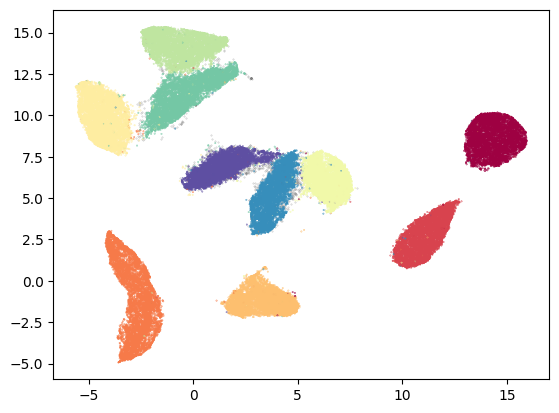

In [ ]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)
print(adjusted_rand_score(mnist.target, labels), adjusted_mutual_info_score(mnist.target, labels))
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');


One Paper: Considerably Improving Clustering Algorithms Using UMAP Dimensionality Reduction Technique: A Comparative Study, 2020 (https://pmc.ncbi.nlm.nih.gov/articles/PMC7340901/)